In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import cv2 as cv
from PIL import Image

In [34]:
%matplotlib inline

In [ ]:
%cd '/content/drive/MyDrive/Datasets/Malaria/cell_images/'

In [35]:
%cd D:\Manu sir\Malaria\cell_images

D:\Manu sir\Malaria\cell_images


In [36]:
un="Uninfected"
#print("no of uninfected images : ",len(os.listdir(un)))

In [37]:
para="Parasitized"
#print("No parasitized images : ",len(os.listdir(para)))

In [19]:
for image in tqdm(os.listdir(un)):
    if image!="Thumbs.db":
        img=cv.imread(os.path.join(un,image))
        print(img.shape)
        break

  0%|                                                                                        | 0/13780 [00:00<?, ?it/s]

(139, 160, 3)


In [38]:
unin=[]
for image in tqdm(os.listdir(un)):
    if image!="Thumbs.db":
        img=Image.open(os.path.join(un,image))
        img=img.resize((64,64))
        img=np.asarray(img)
        unin.append(img)

100%|███████████████████████████████████████████████████████████████████████████| 13780/13780 [01:41<00:00, 135.11it/s]


In [21]:
print(len(unin[794]))
print(len(unin[7]))

64
64


In [39]:
par=[]
for image in tqdm(os.listdir(para)):
    if image!="Thumbs.db":
        img=Image.open(os.path.join(para,image))
        img=img.resize((64,64))
        img=np.asarray(img)
        par.append(img)

100%|███████████████████████████████████████████████████████████████████████████| 13780/13780 [01:33<00:00, 148.02it/s]


In [23]:
print(len(par))

13779


In [24]:
print(len(unin))

13779


In [40]:
ov_images=unin+par

In [26]:
print(len(ov_images))

27558


In [41]:
labels=([0]*(len(os.listdir(un))-1))+([1]*(len(os.listdir(para))-1))

In [ ]:
print(len(labels))

In [42]:
ov_images=np.array(ov_images)

In [43]:
labels=np.array(labels)

In [44]:
ov_images=ov_images/255

In [45]:
from sklearn.utils import shuffle

In [46]:
ov_images,labels=shuffle(ov_images,labels)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(ov_images,labels,test_size=0.2)

In [49]:
print(x_train.shape,y_train.shape)

(22046, 64, 64, 3) (22046,)


In [50]:
print(x_test.shape,y_test.shape)

(5512, 64, 64, 3) (5512,)


In [51]:
import tensorflow
import keras
import torch
import torch.nn as nn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Activation
from keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
import os
import shutil

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

In [53]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomHeight(factor=(0.2, 0.3)),
  tf.keras.layers.experimental.preprocessing.RandomWidth(factor=(0.2, 0.3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [54]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [55]:
model4 = Sequential()

model4.add(Conv2D(16, (3,3), input_shape = (64, 64, 3), activation='relu'))
model4.add(MaxPool2D(2,2))
model4.add(Dropout(0.2))

model4.add(Conv2D(32, (3,3), activation='relu'))
model4.add(MaxPool2D(2,2))
model4.add(Dropout(0.3))

model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(1, activation='sigmoid'))

In [57]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [58]:
history = model4.fit(x_train,y_train,
                              epochs = 20,
                              validation_data=(x_test,y_test))

Epoch 1/20
689/689 [==============================] - 32s 42ms/step - loss: 0.5894 - accuracy: 0.6867 - val_loss: 0.3938 - val_accuracy: 0.8681
Epoch 2/20
689/689 [==============================] - 28s 41ms/step - loss: 0.2719 - accuracy: 0.9070 - val_loss: 0.2030 - val_accuracy: 0.9390
Epoch 3/20
689/689 [==============================] - 22s 32ms/step - loss: 0.2129 - accuracy: 0.9337 - val_loss: 0.1770 - val_accuracy: 0.9456
Epoch 4/20
689/689 [==============================] - 22s 31ms/step - loss: 0.1852 - accuracy: 0.9425 - val_loss: 0.1598 - val_accuracy: 0.9512
Epoch 5/20
689/689 [==============================] - 25s 36ms/step - loss: 0.1716 - accuracy: 0.9478 - val_loss: 0.1519 - val_accuracy: 0.9526
Epoch 6/20
689/689 [==============================] - 25s 36ms/step - loss: 0.1580 - accuracy: 0.9507 - val_loss: 0.1488 - val_accuracy: 0.9543
Epoch 7/20
689/689 [==============================] - 24s 34ms/step - loss: 0.1513 - accuracy: 0.9521 - val_loss: 0.1460 - val_accuracy:

In [59]:
yhat=model4.predict(x_test)>0.5

173/173 [==============================] - 1s 7ms/step


In [60]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix,f1_score

In [61]:
f1_score(y_test,yhat)

0.9524511610762993

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

[[2670  182]
 [  76 2584]]


<AxesSubplot:>

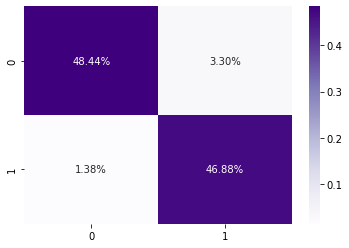

In [63]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(yhat,y_test)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Purples')